# Domácí úkol č. 2 - 🕸 Síťová analýza PID

## 📚 Data
Jako dataset nám poslouží [otevřená data Pražské integrované dopravy](https://pid.cz/o-systemu/opendata/). Konkrétně budeme pracovat s daty [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs), která jsou původně ve formátu GTFS (General Transit Feed Specification). To je formát, který využívá široká škála softwarových aplikací a kvůli tomu jej při publikaci dat využívají také veřejné dopravní agentury včetně PID.

☝️**Pozor!** Pro řešení domácí úlohy vám poskytneme už připravený dataset $D$ ve formátu `csv`. Dataset $D$ jsme pro vás sestavili z dat, která pocházejí z [cestovních řádů](https://pid.cz/o-systemu/opendata/#h-gtfs). Více informací o všech souborech a jejich atributech lze nalézt v [dokumentaci formátu GTFS](https://developers.google.com/transit/gtfs/reference).

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 4 body. Úkol řešíte jako **jednotlivci**.

**✨ Dataset**
* Načtěte si data ze souboru `d.csv`, což je již zmíněný dataset $D$, který obsahuje záznam pro každé dvě **po sobě jdoucí** zastávky nějakého spoje.
* Struktura je následující (pro zjednodušení neuvažujeme service start_date a end_date):
| stop_from | stop_from_name | stop_to | stop_to_name | depart_from | arrive_to | route_type | is_night | mon | tue | wed | thu | fri | sat | sun |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| U699Z3P | Stadion Strahov | U981Z1P | Koleje Strahov | 7:24:00 | 7:25:00 | 3 | 0 | 1 | 1 | 1 | 1 | 1 | 0 | 0 |

* Za jedinečný identifikátor zastávky můžete považovat **název zastávky**. Pozor na stejné názvy zastávek pro různé dopravní prostředky - u takových zastávek můžete uvažovat, že se jedná o jednu a tutéž stanici (v mnoha případech to i platí). 

**⚙️ Předzpracování dat**

* Atributy `depart_from` a `arrive_to` budete chtít nejspíše upravit. Obsahují totiž časové údaje delší než 24 hodin (celkem se jedná o 1.5 % záznamů). Z reference formátu GTFS (info o sloupci, z kterého vznikl `depart_from` a `arive_to`): _Arrival time at a specific stop for a specific trip on a route. … For times occurring after midnight on the service day, enter the time as a value greater than 24:00:00 in HH:MM:SS local time for the day on which the trip schedule begins._ Nicméně narazíte i na chybné časy, které začínají s hodnotou větší než 24. Všechny tyto případy můžete vyřešit pomocí **modulo 24** ☝️.


**🕸️ Základní síťová analýza** (celkem 12 bodů)

Úkolem je analyzovat síť zastávek PID. Zastávky tedy budou uzly sítě. Mezi dvěma zastávkami je orientovaná hrana, pokud jsou to dvě po sobě jdoucí zastávky nějakého spoje (existuje alespoň jeden záznam v datasetu $D$ s odpovídajícími `stop_from`, `stop_to`). Váha hrany je rovna počtu dopravních prostředků, které na dané trase za období jednoho týdne projedou.

Postupujte následovně:
* Začněte volbou libovolného balíčku pro analýzu a vizualizaci sítí (lze využít i zmíněný NetworkX),
* z datasetu $D$ vytvořte reprezentaci dat, která je vhodná pro vámi zvolený vizualizační balíček,
* vytvořte vizualizaci sítě (celkem za 4 body) - vizualizace musí být čitelná, proto můžete vizualizovat i podčást sítě (např. pro určitý dopravní prostředek, např. tramvaje (kromě vizualizace sítě lanovky nebo metra, tu neuznáváme) nebo nějaký podgraf - řešení ponecháme na vás),
* pomocí alespoň tří měr centrality analyzujte důležitost zastávek za období jednoho týdne (pondělí - neděle) a komentujte slovně, co tyto míry vzhledem ke konkrétním datům znamenají (každá míra za 2 body, celkem tedy za 6 bodů),
* vytvořte vizualizaci pro alespoň jednu míru centrality (celkem za 2 body).

**❓ Vlastní otázky** (3 body za každou otázku, celkem max. 9 bodů)

Vytvořte 3 otázky (můžete i více), založené na filtraci datasetu $D$ a odpovídejte na ně vhodnými vizualizacemi. Otázky pro inspiraci:
* Mění se důležité zastávky v závislosti na denním/nočním provozu?
* Je rozdíl ve vytíženosti zastávek během pracovního týdne/víkendu?
* ...

**🔥 Data navíc**

V souboru `stops.txt` je u každé zastávky uvedena **zeměpisná šířka a délka**. Tato data můžete využít pro rozšíření své analýzy a také vám mohou pomoci při layoutování grafu. ☝️ Pozor na stejné názvy zastávek s trochu jinou lokací pro různé dopravní prostředky. Je třeba navrhnout nějaké řešení (např. první, průměr, těžiště mnohoúhelníku apod., libovolně dle vašeho úsudku) a to zdůvodnit.

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 4 body za průběžné komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za vizualizaci sítě,
- 6 bodů za komentovanou analýzu alespoň 3 měr centrality,
- 2 body za vizualizaci jedné z měr centrality,
- 9 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 2 získat maximálně 25 bodů.

In [2]:
# a teď už je to na vás 💪
# níže vložte své řešení

Pro přehlednost budu vizualizovat pouze dopravní síť tramvají

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors


Načteme data a vyberreme si pouze tramvaje (route_type == 0).

In [6]:
data = pd.read_csv('d.csv')
data = data[data['route_type'] == 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 575015 entries, 35575 to 1642432
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   stop_from       575015 non-null  object
 1   stop_from_name  575015 non-null  object
 2   stop_to         575015 non-null  object
 3   stop_to_name    575015 non-null  object
 4   depart_from     575015 non-null  object
 5   arrive_to       575015 non-null  object
 6   route_type      575015 non-null  int64 
 7   is_night        575015 non-null  int64 
 8   monday          575015 non-null  int64 
 9   tuesday         575015 non-null  int64 
 10  wednesday       575015 non-null  int64 
 11  thursday        575015 non-null  int64 
 12  friday          575015 non-null  int64 
 13  saturday        575015 non-null  int64 
 14  sunday          575015 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 70.2+ MB


Načteme si informace o zastávkách a zbavíme se nechtěných hodnot.

In [8]:
stops = pd.read_csv('stops.txt')
#stops.info()

In [9]:
stops = stops.drop_duplicates(subset = 'stop_name')
stops = stops.dropna(subset = 'stop_name')
stops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7547 entries, 0 to 16423
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stop_id              7547 non-null   object 
 1   stop_name            7547 non-null   object 
 2   stop_lat             7547 non-null   float64
 3   stop_lon             7547 non-null   float64
 4   zone_id              7208 non-null   object 
 5   stop_url             0 non-null      float64
 6   location_type        7547 non-null   int64  
 7   parent_station       151 non-null    object 
 8   wheelchair_boarding  7547 non-null   int64  
 9   level_id             151 non-null    object 
 10  platform_code        6696 non-null   object 
 11  asw_node_id          7361 non-null   float64
 12  asw_stop_id          7152 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 825.5+ KB


Zjistíme kolikrát týdně je daný spoj dvou zastávek používán.

In [11]:
data['total_trips'] = data[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']].sum(axis=1)

In [12]:
edgelist = data.groupby(['stop_from_name', 'stop_to_name'])['total_trips'].sum().reset_index() 
edgelist

,stop_from_name,stop_to_name,total_trips
0,Albertov,Botanická zahrada,3113
1,Albertov,Ostrčilovo náměstí,5093
2,Albertov,Výtoň,1700
3,Anděl,Arbesovo náměstí,4345
4,Anděl,Bertramka,7207
...,...,...,...
656,Švandovo divadlo,Arbesovo náměstí,4333
657,Švandovo divadlo,Újezd,4345
658,Želivského,Nákladové nádraží Žižkov,4928
659,Želivského,Olšanské hřbitovy,3545


Nyní máme edgelist pro týdenní používání sítě. Vytvoříme z tohoto dataframu graf. Ke každé node přidáme její podrobnější informace (longitude, latitude, name) a pro hrany přidáme váhu v podobě jejich využití.

C:\Users\Ondra\AppData\Local\Temp\ipykernel_9768\756995711.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')


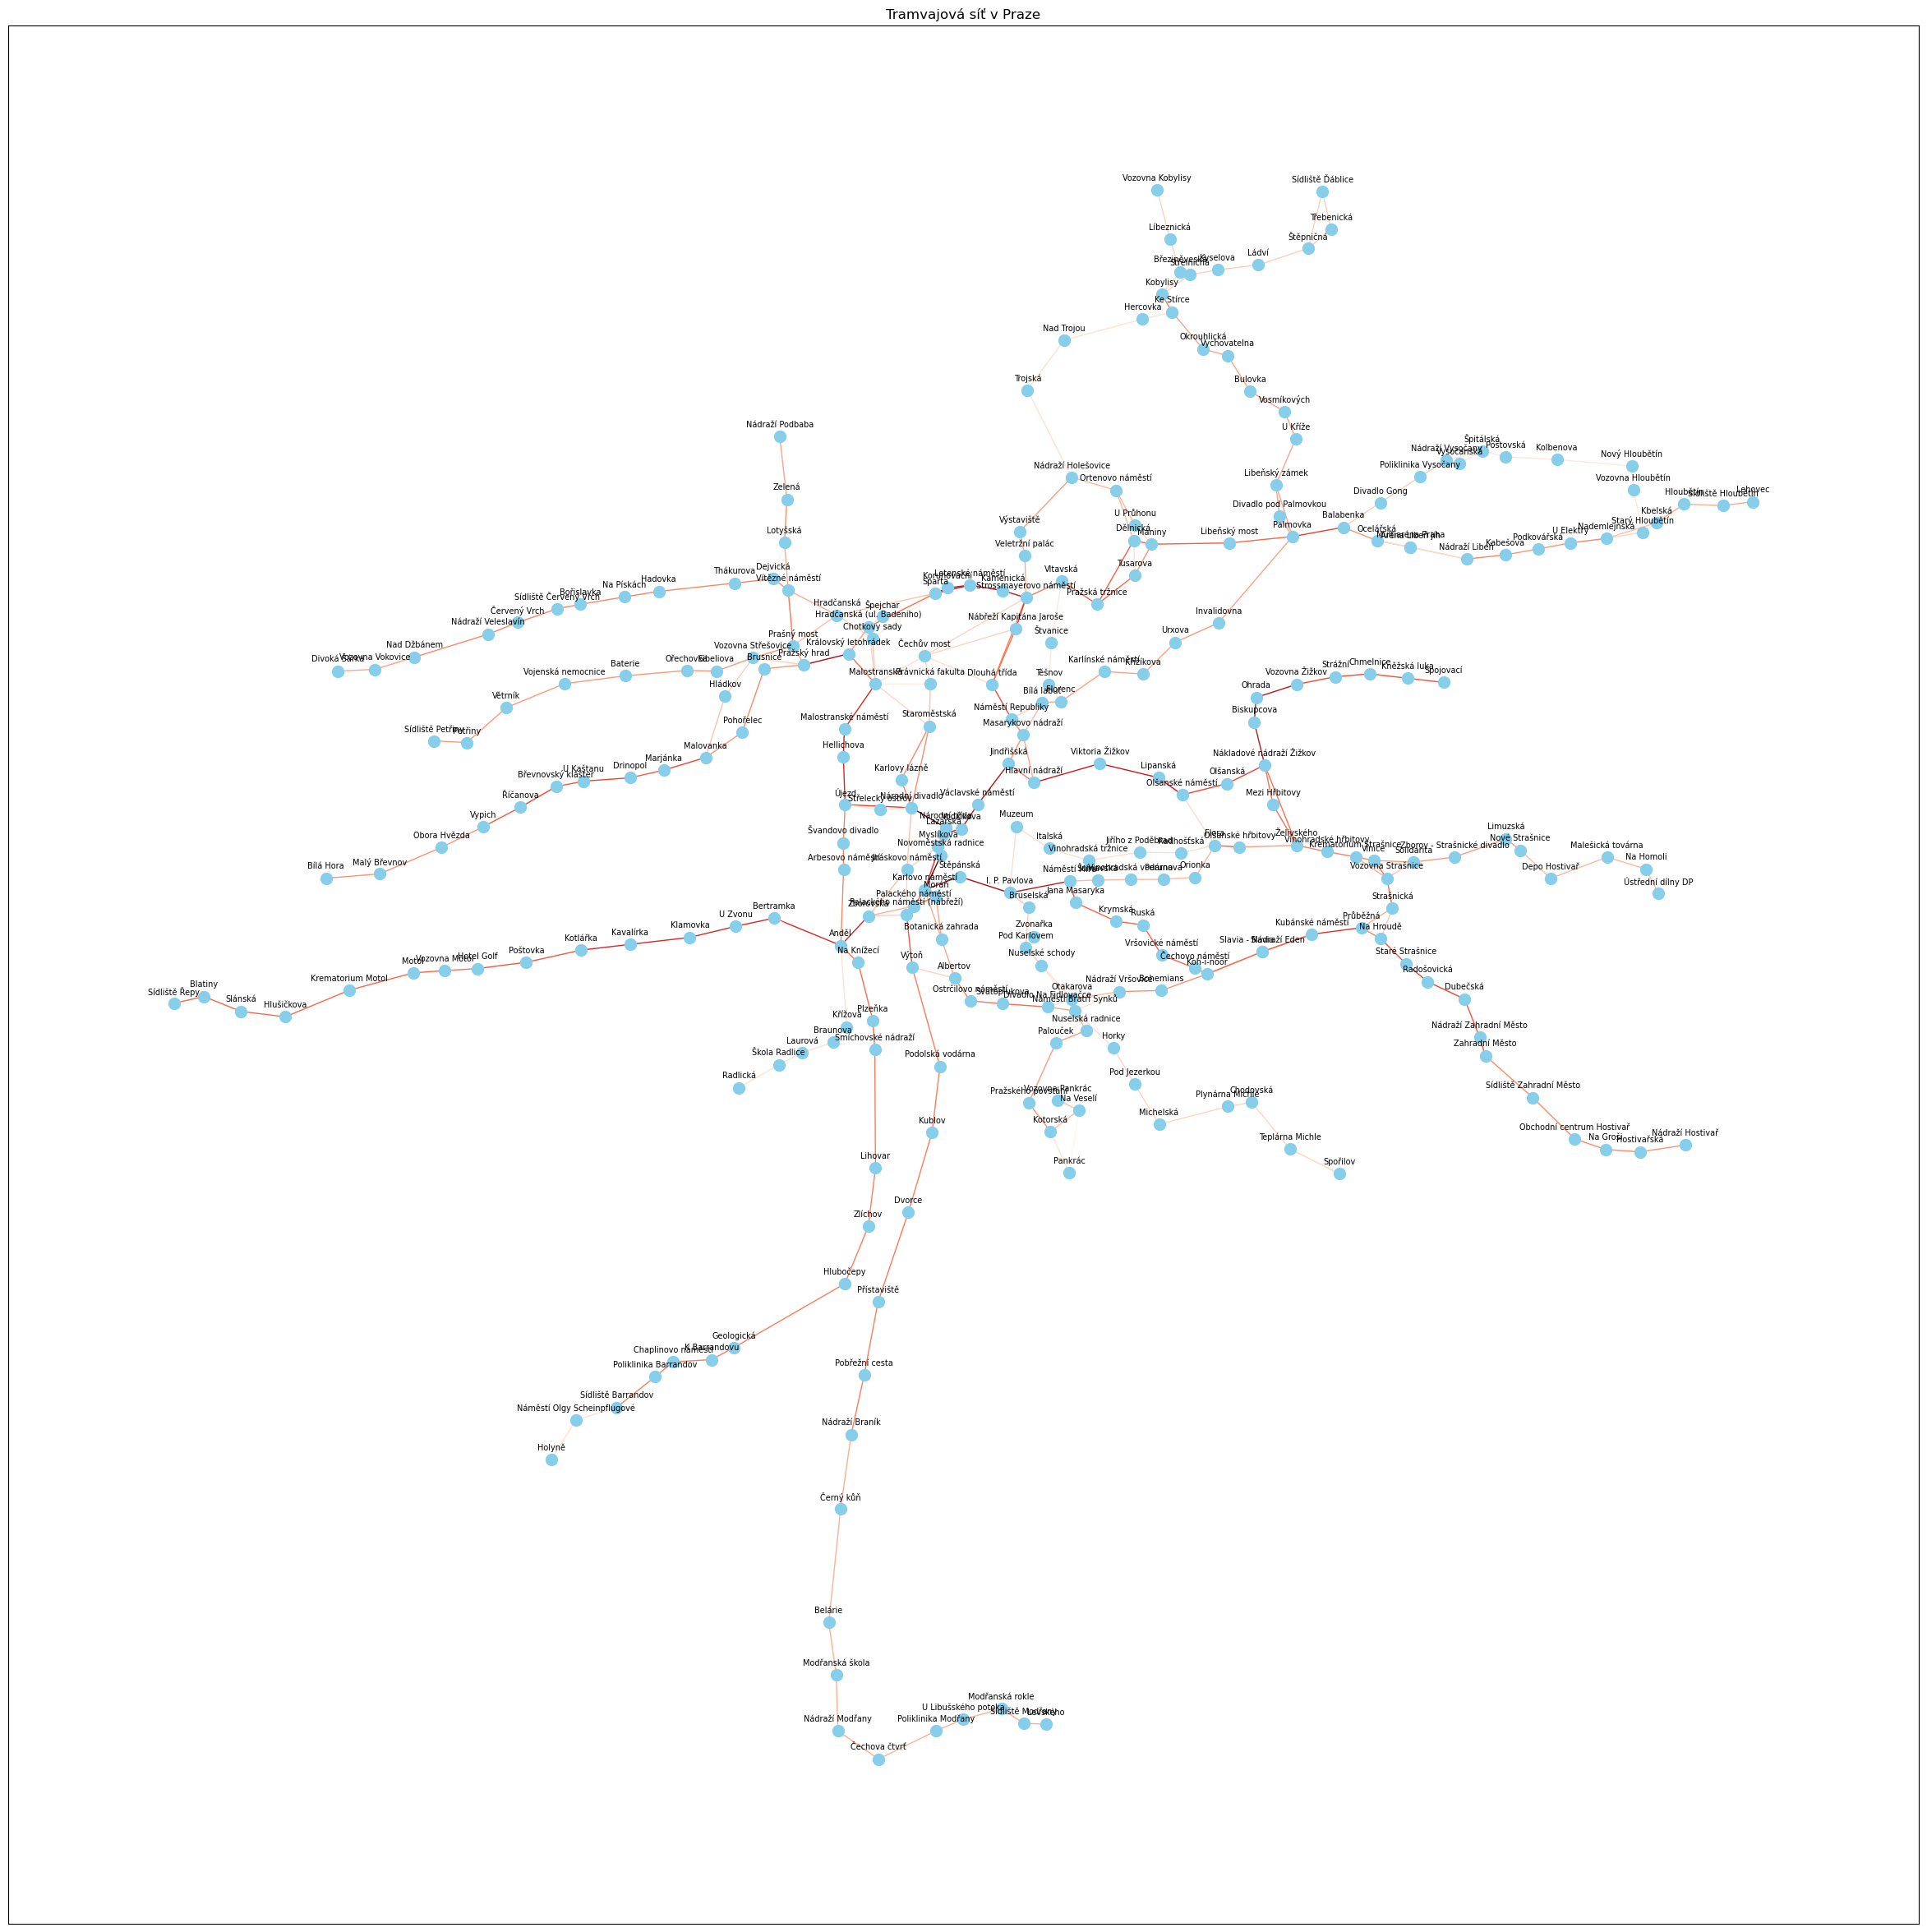

In [14]:
G = nx.DiGraph()
G = nx.from_pandas_edgelist(edgelist, source = 'stop_from_name', target = 'stop_to_name', edge_attr = 'total_trips')

#ChatGPT funkce
for _, row in stops.iterrows():
    nx.set_node_attributes(G, {row['stop_name']: {'name': row['stop_name'], 
                                                'latitude': row['stop_lat'], 
                                                'longitude': row['stop_lon']}})

pos = {node: (G.nodes[node]['longitude'], G.nodes[node]['latitude']) for node in G.nodes}
sc_pos = {node: (x * 10, y * 5) for node, (x, y) in pos.items()}
weights = nx.get_edge_attributes(G, 'total_trips')
label_pos = {node: (x, y + 0.005) for node, (x, y) in sc_pos.items()}

#ChatGPT
norm = mcolors.Normalize(vmin=min(weights.values()), vmax=max(weights.values()))
cmap = cm.get_cmap('Reds')  
edge_colors = [cmap(norm(weight)) for weight in weights.values()]

plt.figure(figsize=(30,30))
nx.draw_networkx_nodes(G, sc_pos, node_size = 100, node_color = 'skyblue')
nx.draw_networkx_edges(G, sc_pos, edge_color = edge_colors)
nx.draw_networkx_labels(G, label_pos, font_size = 7)
plt.title('Tramvajová síť v Praze')
plt.show()                    

Tato vizualizace je ale příliš velká, nečitelná a npřehledná. Zobrazíme si tedy proto část Prahy nám velmi známou. Její západní břeh.

In [16]:
west_nodes = stops[stops['stop_lon'] < 14.409919]
west_nodes = west_nodes[west_nodes['stop_lat'] > 50.051434]
west_nodes = pd.merge(west_nodes, data, left_on='stop_name', right_on = 'stop_from_name', how='inner')
west_nodes = west_nodes.drop_duplicates(subset = 'stop_name')
west_nodes = west_nodes['stop_name']
west_nodes

0                    Bořislavka
1917                 Hradčanská
3800                   Dejvická
5717               Malostranská
10647        Smíchovské nádraží
                  ...          
157458                   Zelená
159088    Sídliště Červený Vrch
161005       Břevnovský klášter
163785               Na Knížecí
166201                 Braunova
Name: stop_name, Length: 72, dtype: object

Ručně si upravíme polohu některých porblémových labelů.

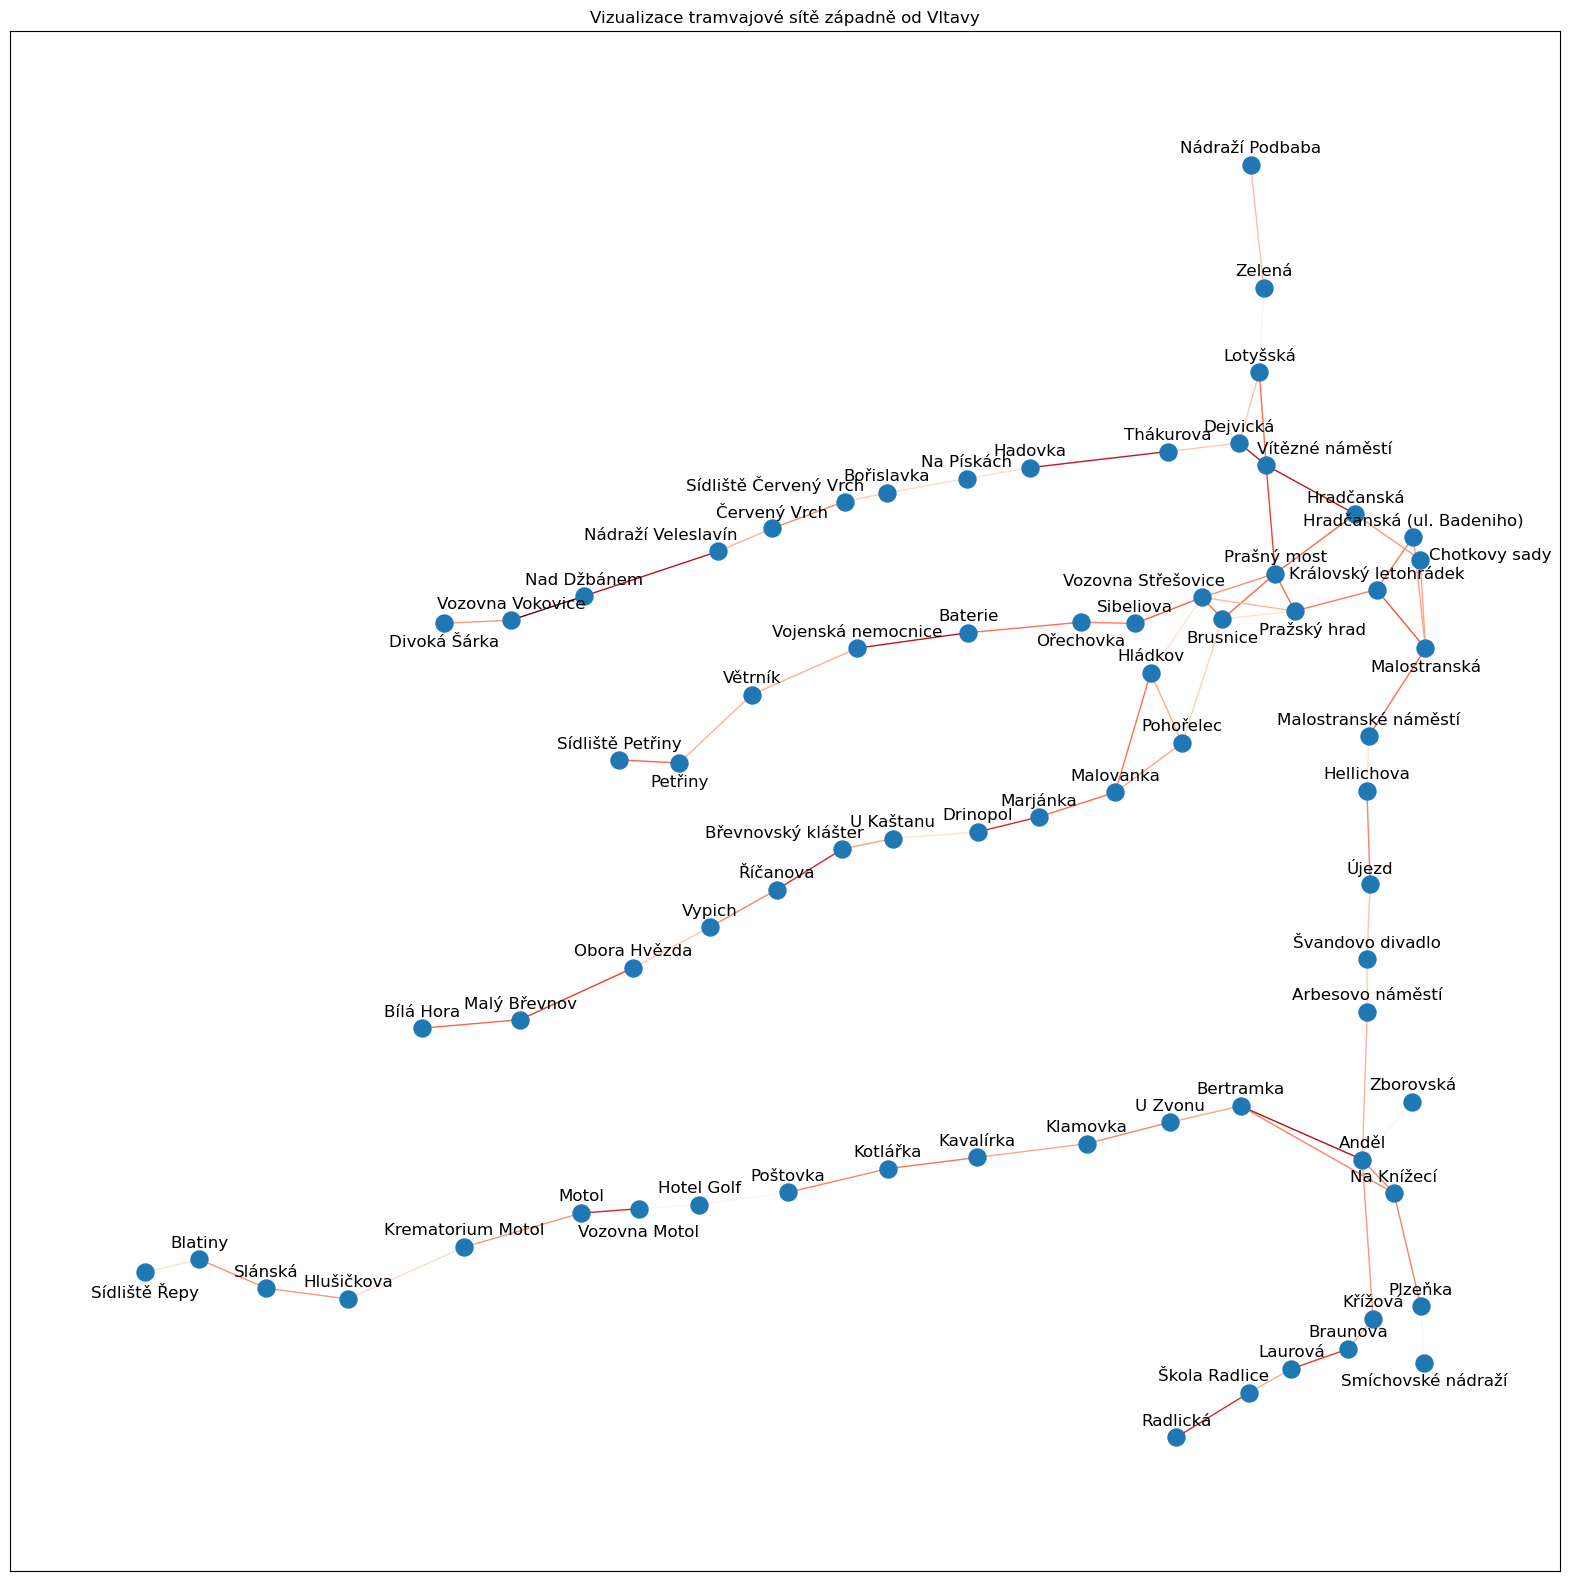

In [18]:
label_pos = {node: (x, y + 0.0007) for node, (x, y) in pos.items()}
label_pos['Pražský hrad'] = ((label_pos['Pražský hrad'])[0]+0.0015, label_pos['Pražský hrad'][1]-0.0015)
label_pos['Petřiny'] = ((label_pos['Petřiny'])[0]+0, label_pos['Petřiny'][1]-0.0015)
label_pos['Divoká Šárka'] = ((label_pos['Divoká Šárka'])[0]+0, label_pos['Divoká Šárka'][1]-0.0015)
label_pos['Ořechovka'] = ((label_pos['Ořechovka'])[0]+0, label_pos['Ořechovka'][1]-0.0015)
label_pos['Vozovna Motol'] = ((label_pos['Vozovna Motol'])[0]+0, label_pos['Vozovna Motol'][1]-0.0017)
label_pos['Vítězné náměstí'] = ((label_pos['Vítězné náměstí'])[0]+0.005, label_pos['Vítězné náměstí'][1]-0)
label_pos['Smíchovské nádraží'] = ((label_pos['Smíchovské nádraží'])[0]+0, label_pos['Smíchovské nádraží'][1]-0.0015)
label_pos['Břevnovský klášter'] = ((label_pos['Břevnovský klášter'])[0]-0.005, label_pos['Břevnovský klášter'][1]-0)
label_pos['Brusnice'] = ((label_pos['Brusnice'])[0]+0, label_pos['Brusnice'][1]-0.0015)
label_pos['Vozovna Střešovice'] = ((label_pos['Vozovna Střešovice'])[0]-0.005, label_pos['Vozovna Střešovice'][1]-0)
label_pos['Malostranská'] = ((label_pos['Malostranská'])[0]+0, label_pos['Malostranská'][1]-0.0015)
label_pos['Sídliště Červený Vrch'] = ((label_pos['Sídliště Červený Vrch'])[0]-0.006, label_pos['Sídliště Červený Vrch'][1]-0)
label_pos['Nádraží Veleslavín'] = ((label_pos['Nádraží Veleslavín'])[0]-0.005, label_pos['Nádraží Veleslavín'][1]-0)
label_pos['Škola Radlice'] = ((label_pos['Škola Radlice'])[0]-0.003, label_pos['Škola Radlice'][1]-0)
label_pos['Chotkovy sady'] = ((label_pos['Chotkovy sady'])[0]+0.006, label_pos['Chotkovy sady'][1]-0.0005)
label_pos['Sídliště Řepy'] = ((label_pos['Sídliště Řepy'])[0]+0, label_pos['Sídliště Řepy'][1]-0.0015)





plt.figure(figsize=(20,20))
sub = G.subgraph(west_nodes)
nx.draw_networkx_nodes(sub, pos, node_size = 150)
nx.draw_networkx_edges(sub, pos, edge_color = edge_colors)
nx.draw_networkx_labels(sub, label_pos)
plt.title('Vizualizace tramvajové sítě západně od Vltavy')
plt.show()

<h1>Centralita<h1>

<h2>Stupňová centralita<h2>

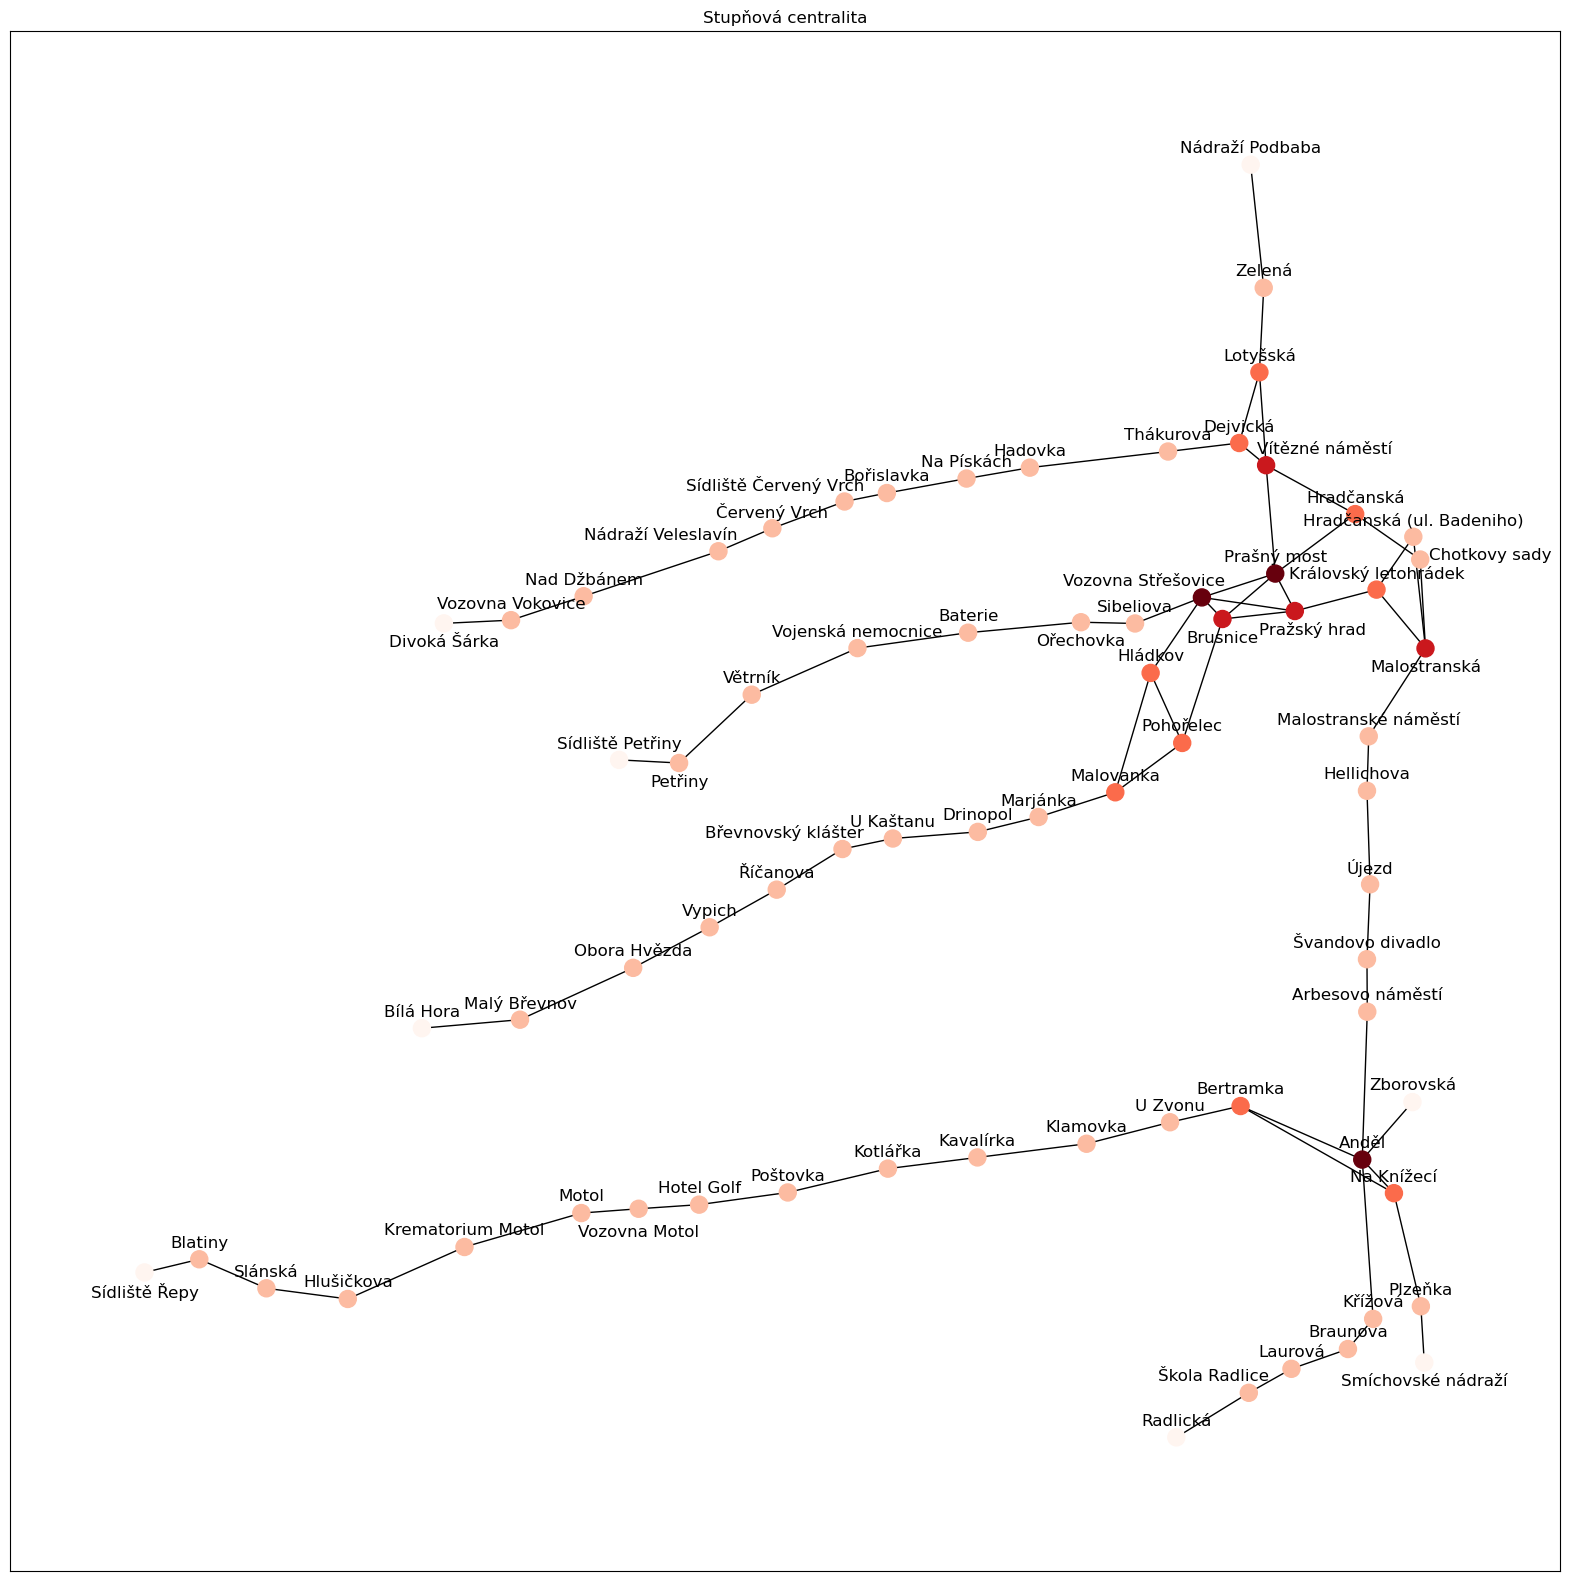

In [21]:
degree_centrality = nx.degree_centrality(sub)
degree_centrality
nx.set_node_attributes(sub, degree_centrality, 'degree_centrality')
node_col = [degree_centrality[node] for node in sub.nodes]


plt.figure(figsize=(20,20))

nx.draw_networkx_nodes(sub, pos, node_size = 150, node_color=node_col, cmap='Reds')
nx.draw_networkx_edges(sub, pos)
nx.draw_networkx_labels(sub, label_pos)
plt.title('Stupňová centralita')
plt.show()

Můžeme vidět, že zastávky Anděl, Vozovna Střešovice a Prašný most mají největší stupňovou centralitu a slouží tedy jako hlavní křižovatky tramvají v této oblasti.

<h2>Centralita blízkosti<h2>

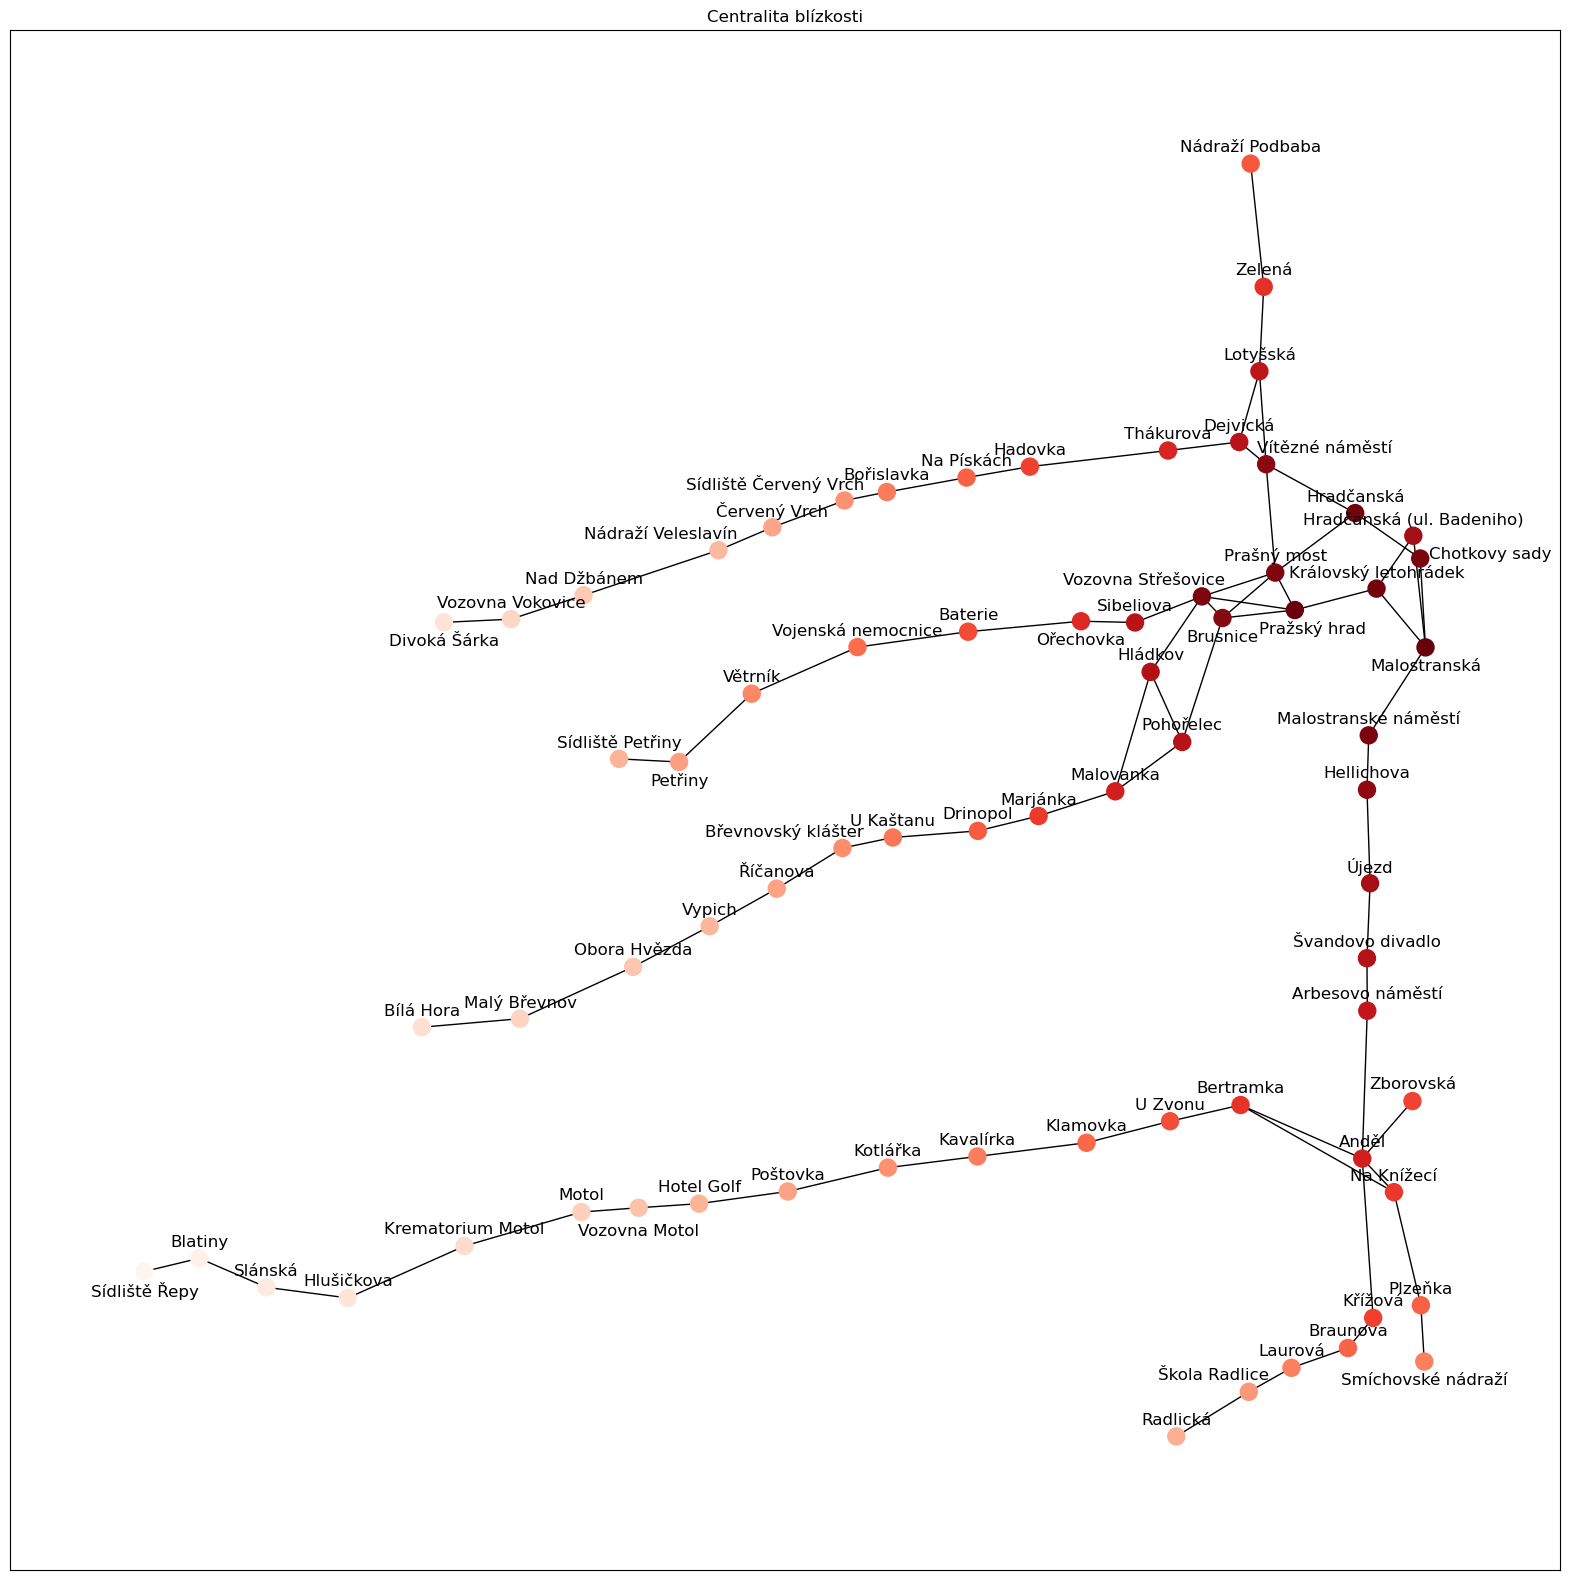

In [24]:
closeness_centrality = nx.closeness_centrality(sub)
nx.set_node_attributes(sub, closeness_centrality, 'closeness_centrality')
node_col = [closeness_centrality[node] for node in sub.nodes]


plt.figure(figsize=(20,20))

nx.draw_networkx_nodes(sub, pos, node_size = 150, node_color=node_col, cmap='Reds')
nx.draw_networkx_edges(sub, pos)
nx.draw_networkx_labels(sub, label_pos)
plt.title('Centralita blízkosti')
plt.show()

Z centrality blízkosti zjišťujeme, že zástavky s nejmenší průměrnou vzdáleností do všech vrcholů leží v blízkosti Pražského hradu. Díky dlouhým trasám bez odboček a propojeních, je to zde poměrně jasná věc.

<h2>Centralita mezilehlosti<h2>

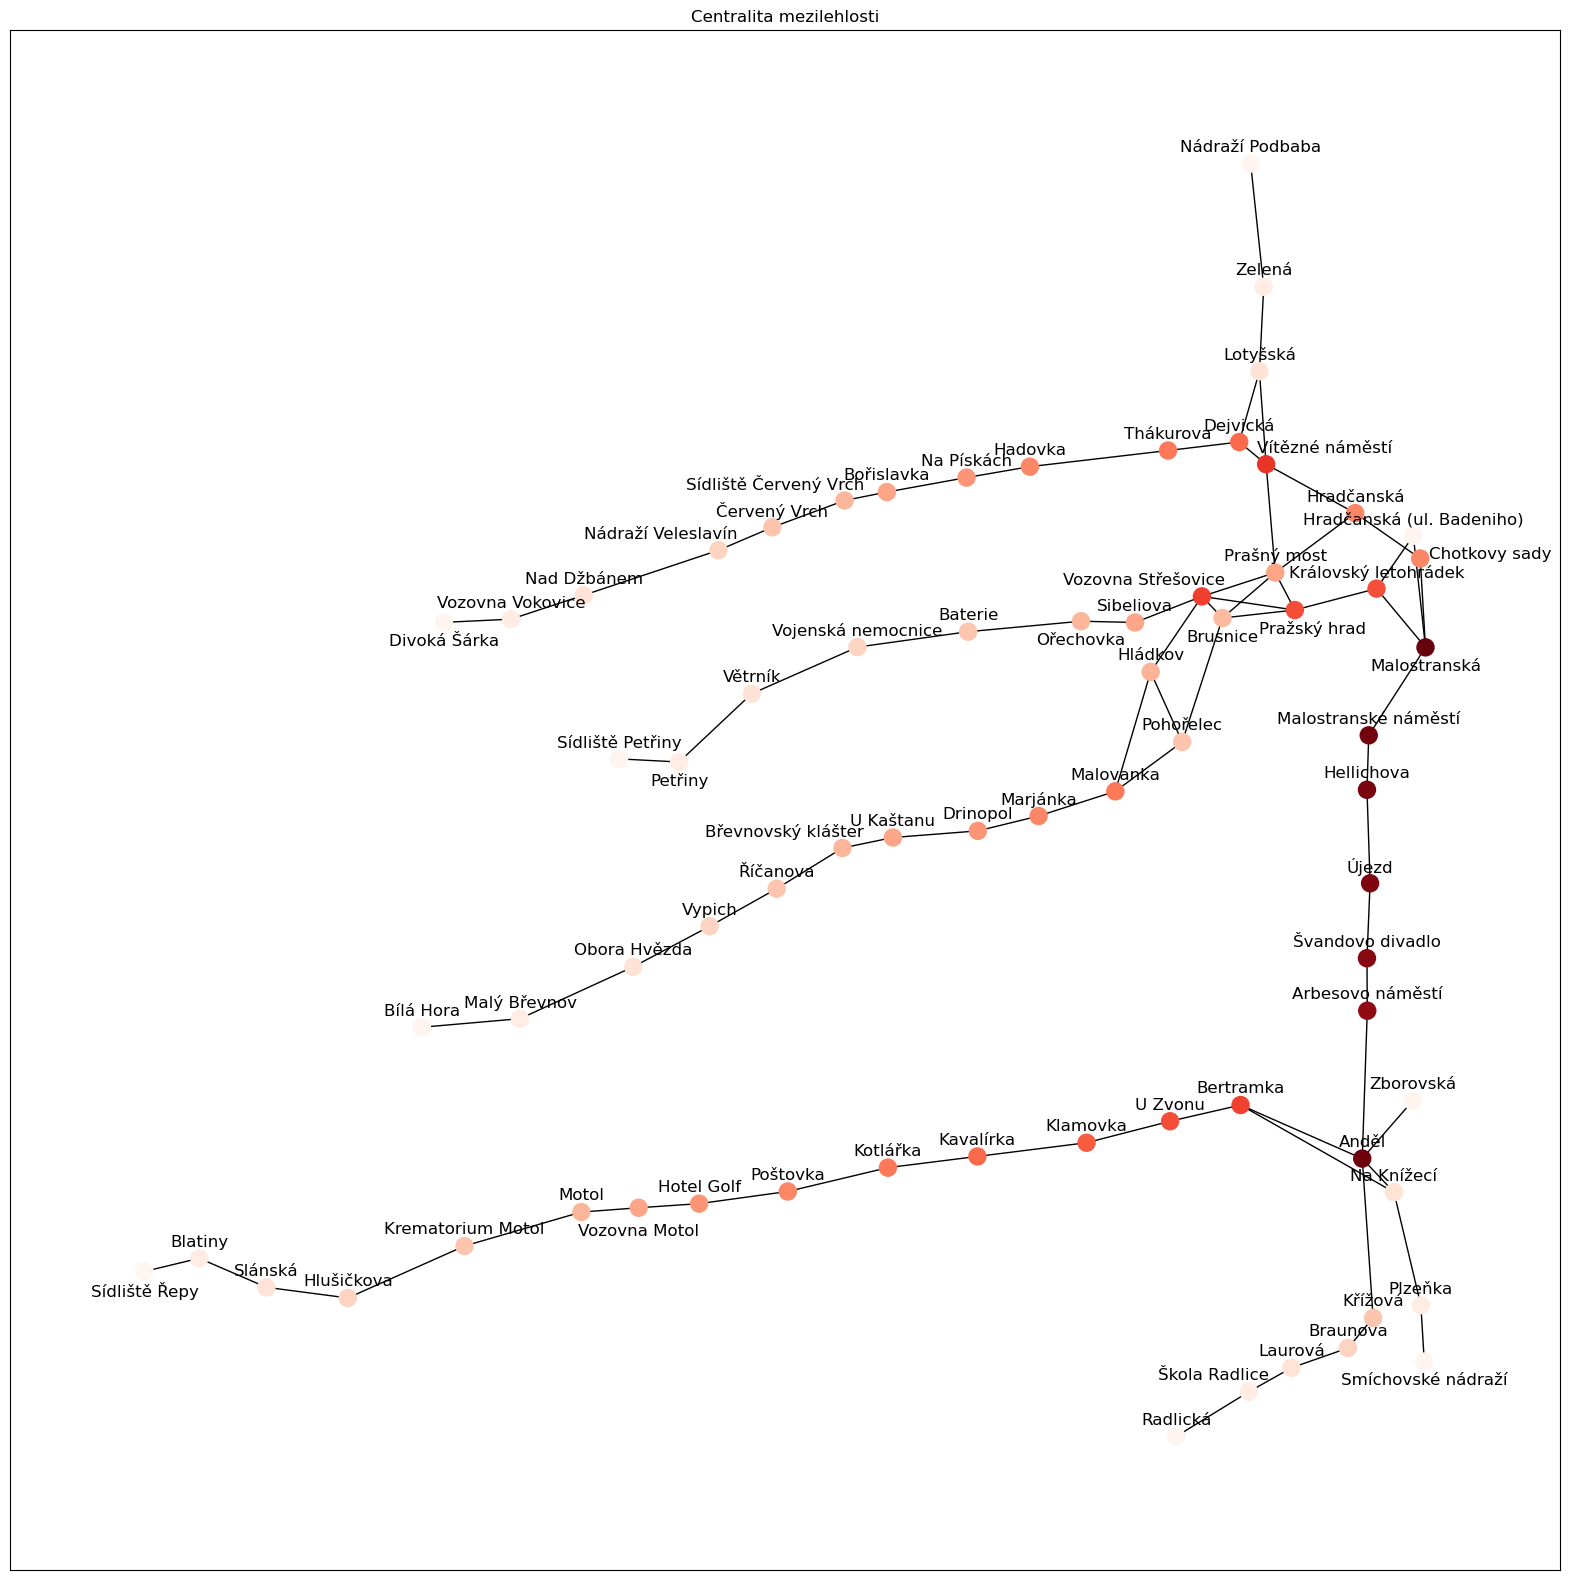

In [27]:
betweenness_centrality  = nx.betweenness_centrality  (sub)
nx.set_node_attributes(sub, betweenness_centrality , 'betweenness_centrality ')
node_col = [betweenness_centrality [node] for node in sub.nodes]


plt.figure(figsize=(20,20))

nx.draw_networkx_nodes(sub, pos, node_size = 150, node_color=node_col, cmap='Reds')
nx.draw_networkx_edges(sub, pos)
nx.draw_networkx_labels(sub, label_pos)
plt.title('Centralita mezilehlosti')
plt.show()

Vidíme, že od Malostranské po Anděl jsou všechny zástavky důležité. Slouží jako most mezi spodní a vrchní komponentou. Pro zlepšení provozu by se tyto komponenty měly propojit více způsoby, abychom ulevili úseku Malostranská-Anděl.

<h1>Vlastní otázky<h1>

<h2>Otázka 1: Jaké zastávky projedeme, pokud chceme jet z Motola na Dejvickou?<h2>

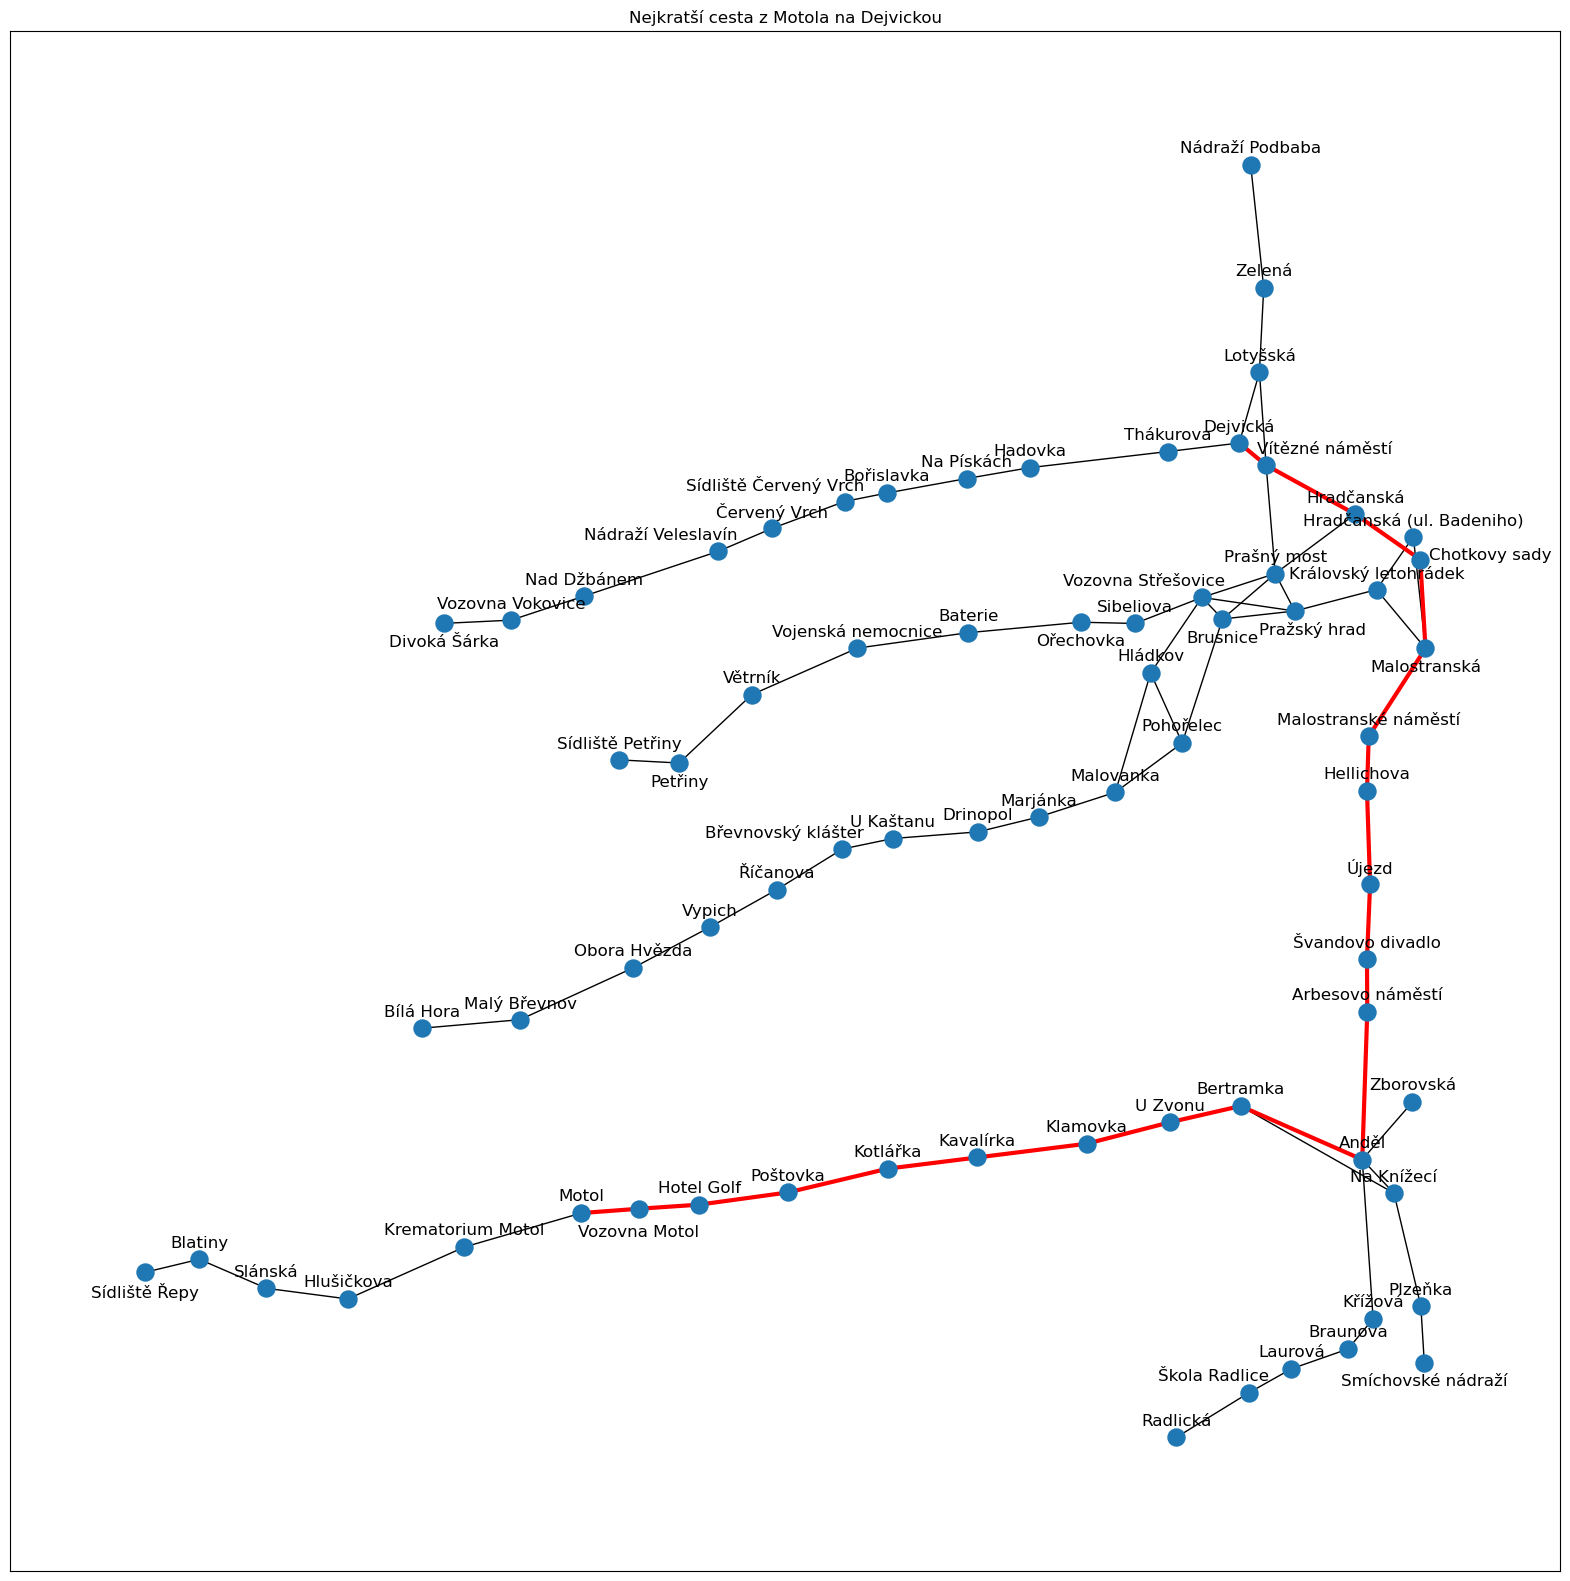

In [31]:
shortest_path = nx.shortest_path(sub, source='Motol', target='Dejvická')
shortest_path_edges = list(zip(shortest_path, shortest_path[1:]))

plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(sub, pos, node_size = 150)
nx.draw_networkx_edges(sub, pos)
nx.draw_networkx_edges(sub, pos, edgelist = shortest_path_edges, edge_color = 'red', width = 3)
nx.draw_networkx_labels(sub, label_pos)
plt.title('Nejkratší cesta z Motola na Dejvickou')
plt.show()

<h2>Otázka 2: Jak se změní stupňová centralita pro noční linky?<h2>

Vytvoříme dataframe vyfiltrovaný pro noční linky spoje. Z toho uděláme graf stejně jako výš.

In [34]:
night_data = data[data['is_night'] == 1]
night_edgelist = night_data.groupby(['stop_from_name', 'stop_to_name'])['total_trips'].sum().reset_index() 
night_edgelist

,stop_from_name,stop_to_name,total_trips
0,Albertov,Botanická zahrada,213
1,Albertov,Ostrčilovo náměstí,235
2,Anděl,Arbesovo náměstí,230
3,Anděl,Bertramka,330
4,Anděl,Na Knížecí,70
...,...,...,...
545,Švandovo divadlo,Arbesovo náměstí,197
546,Švandovo divadlo,Újezd,230
547,Želivského,Nákladové nádraží Žižkov,160
548,Želivského,Olšanské hřbitovy,240


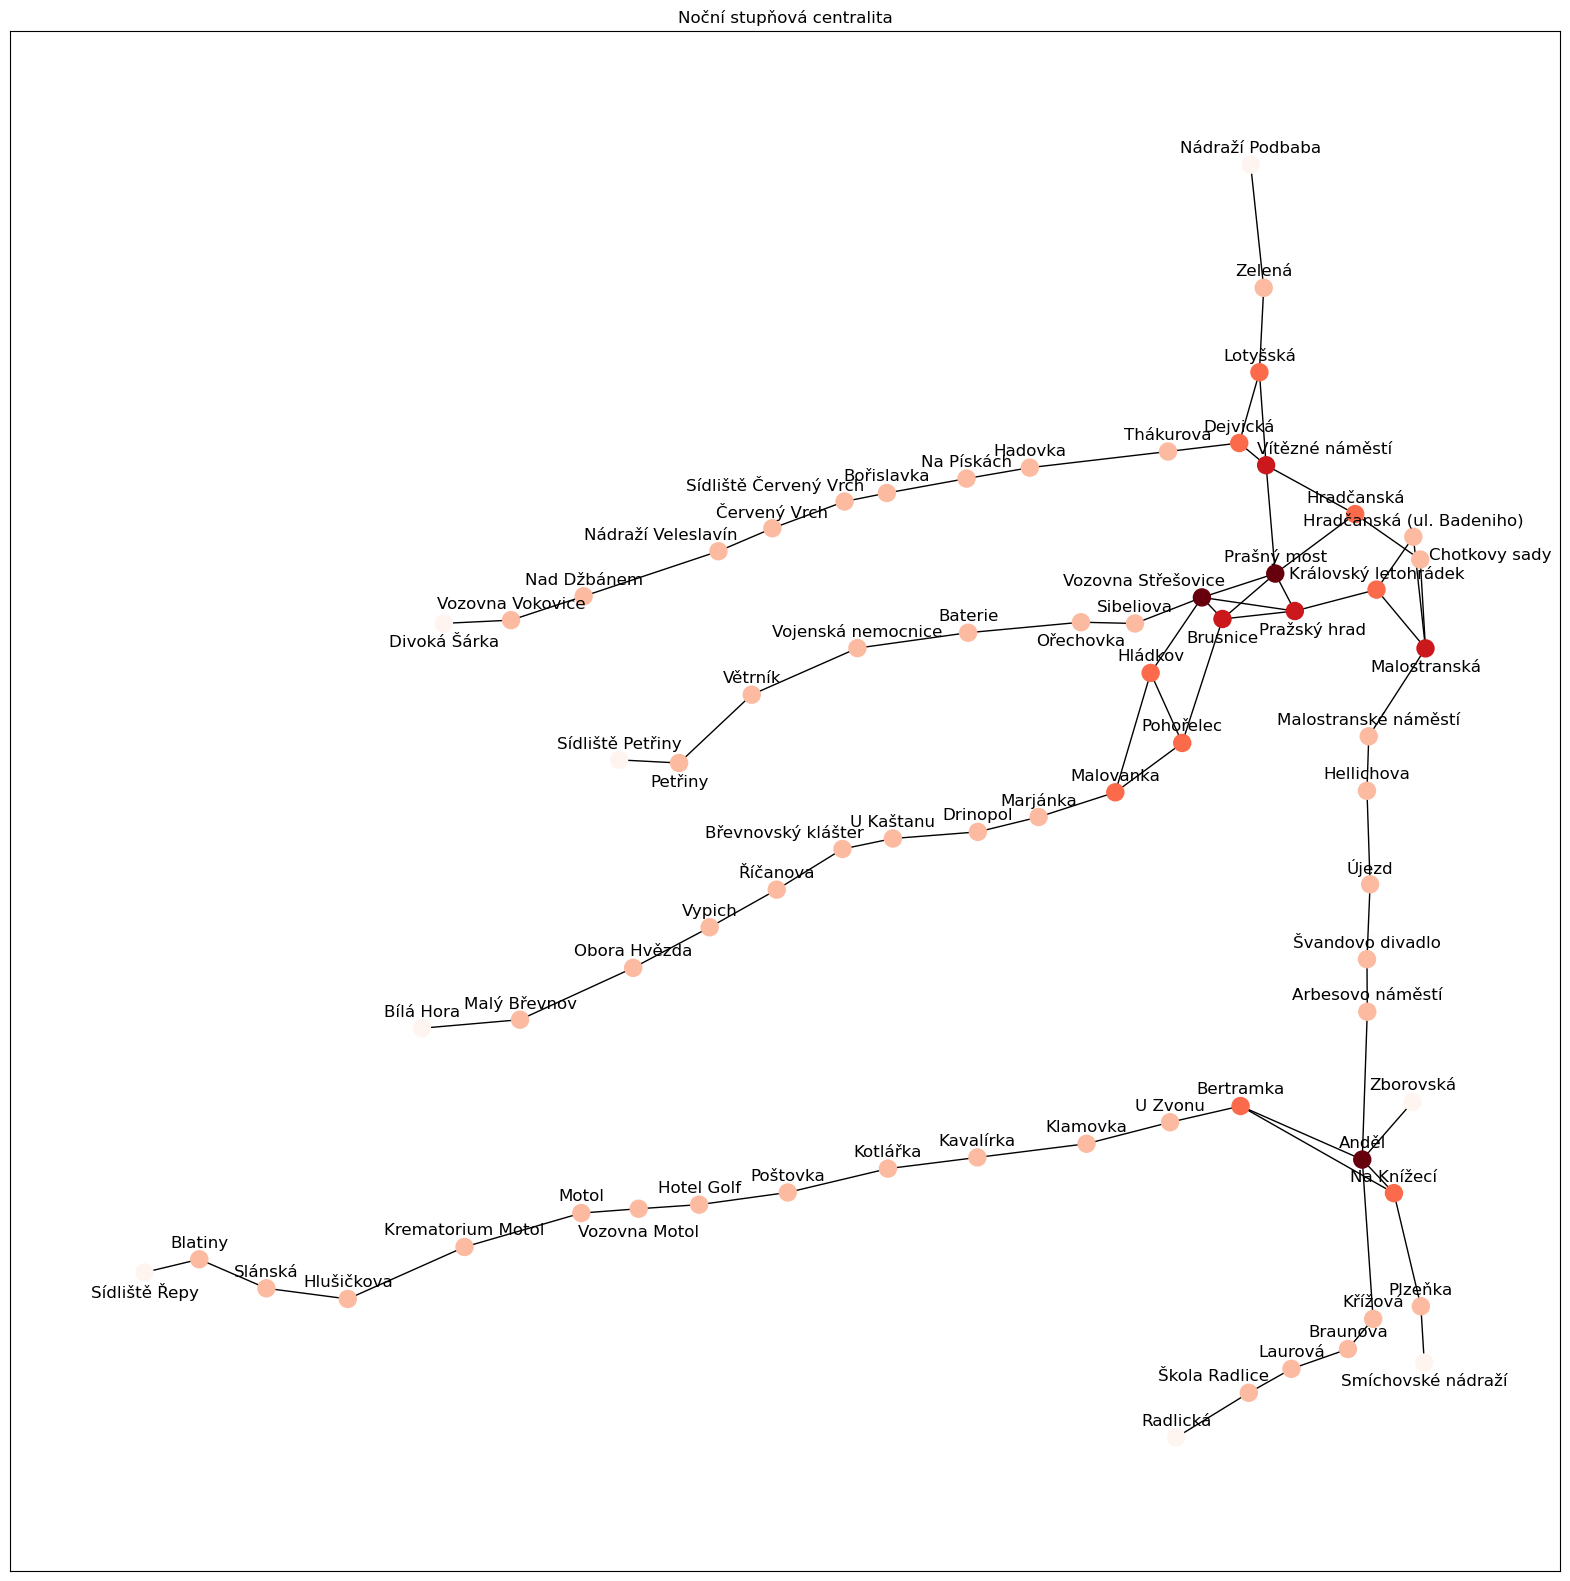

In [35]:
night_G = nx.DiGraph()
night_G = nx.from_pandas_edgelist(night_edgelist, source = 'stop_from_name', target = 'stop_to_name', edge_attr = 'total_trips')

for _, row in stops.iterrows():
    nx.set_node_attributes(night_G, {row['stop_name']: {'name': row['stop_name'], 
                                                'latitude': row['stop_lat'], 
                                                'longitude': row['stop_lon']}})


night_sub = G.subgraph(west_nodes)
node_col = [degree_centrality[node] for node in sub.nodes]

plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(night_sub, pos, node_size = 150, node_color = node_col, cmap = 'Reds')
nx.draw_networkx_edges(night_sub, pos)
nx.draw_networkx_labels(night_sub, label_pos)
plt.title('Noční stupňová centralita')
plt.show()

Můžeme vidět, že na našem grafu zůstaly zastávky Anděl, Vozovna Střešovice a Prašný most stejné. To znamená, že noční linky se pohybují po síti téměř totožně jako ty denní.

<h2>Otázka 3: Jak se změní celková konektivita sítě, pokud odstraníme zastávky s nízkou stupňovou centralitou?<h2>

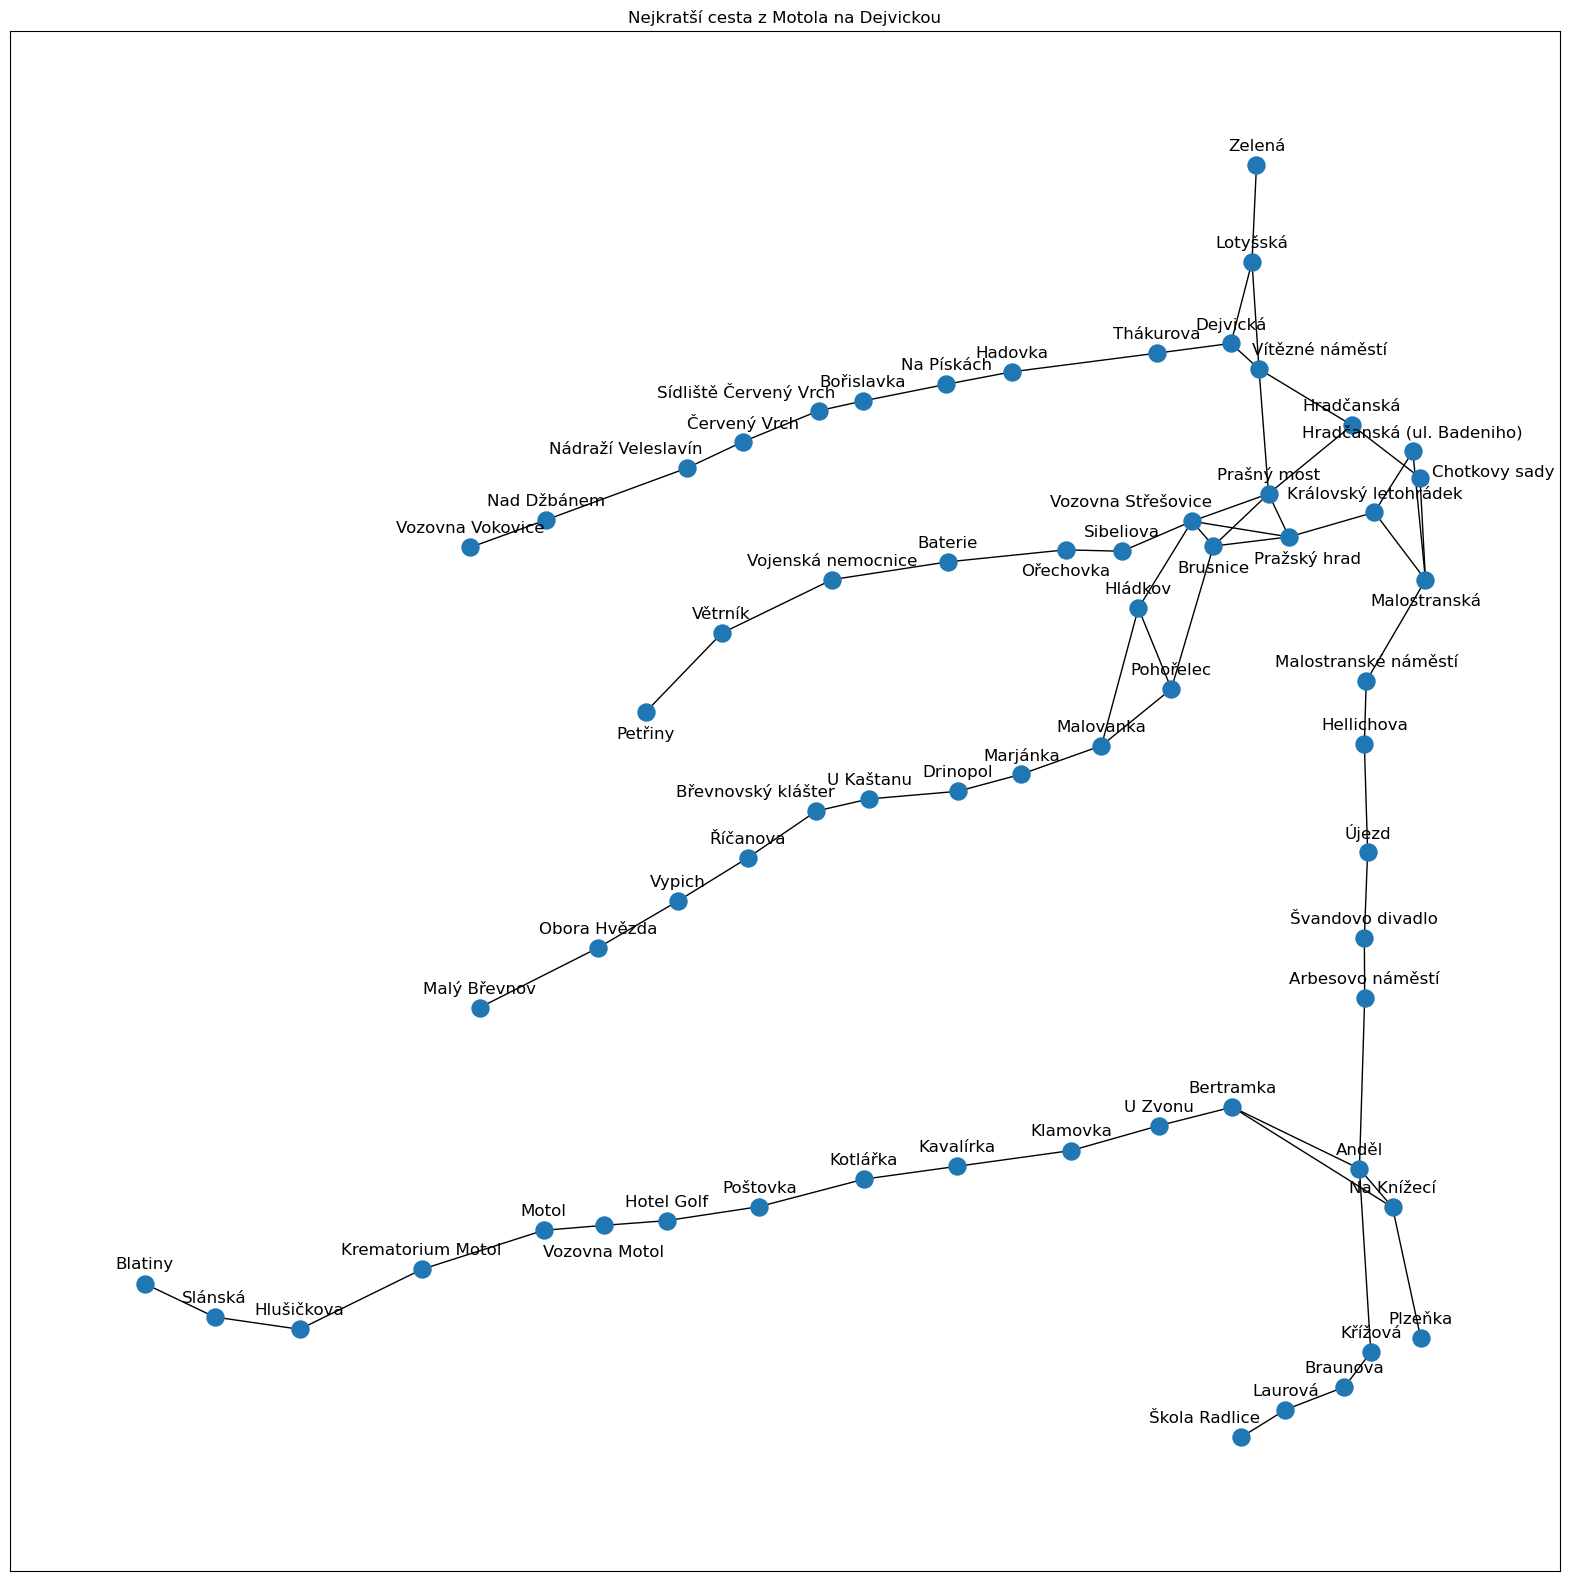

In [38]:
degree_centrality
no_low_centrality_sub = sub.copy()

#print(degree_centrality)
low_centrality_nodes = [node for node, value in degree_centrality.items() if value < 0.025]
#print(low_centrality_nodes)

no_low_centrality_sub.remove_nodes_from(low_centrality_nodes)
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(no_low_centrality_sub, pos, node_size = 150)
nx.draw_networkx_edges(no_low_centrality_sub, pos)
nx.draw_networkx_labels(no_low_centrality_sub, label_pos)
plt.title('Nejkratší cesta z Motola na Dejvickou')
plt.show()

Můžeme vidět, že nám z grafu zmizeli koncové zastávky, což znamemná, že síť je robustně vystavěná. Graf zůstal i nadále spojitý, což podporuje naše tvrzení.